In [5]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
iphone_reviews = []

In [7]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip
     

In [8]:

with open("iphone.txt","w",encoding = 'utf-8') as output:
    output.write(str(iphone_reviews))

In [9]:

import os
os.getcwd()

'C:\\Users\\Hp'

In [10]:
red_rev_string = " ".join(iphone_reviews)

In [11]:
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [12]:
red_rev_string

' as usual great premium phone of prosthis time the apple iphone uses the right angled bezel of the iphone s which looks square and it feels good in the hand it feels better than the sleek bezel of the iphone x especially the mm thickness with right angles the border is particularly stylish the camera is awesome the night view mode turns on automatically and the imaging effect is really good video stabilization is also good the filter mode is quite good many android phones are still many miles away from these tones even though there are good imitations apple was able to improve its tones image quality is perfect and there is little or no noise even in a low light environment signal nothing to say it is much better in iphone pro wifi also consthere is a problem with the hand handling of this phone oh yes the iphone is light to handle however it is not easy to handle the iphone comes with metal edges and there have been multiple complaints with respect to these edges if you handle this p

In [13]:
red_rev_words = red_rev_string.split(" ")

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [16]:
red_rev_string =" ".join(red_rev_words)

In [17]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

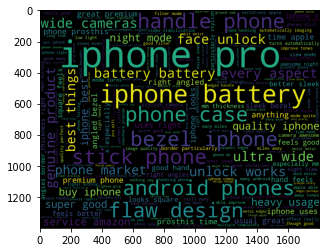

In [18]:
plt.imshow(wordcloud_ip)


In [19]:
with open("negative-words.txt","r",encoding="ISO-8859-1") as neg:
  negwords = neg.read().split("\n")

In [20]:
negwords =negwords[37:]

In [21]:
red_pos = " ".join([w for w in red_rev_words if w in negwords])

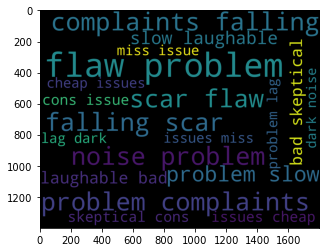

In [22]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

plt.imshow(wordcloud_pos)

In [23]:
red_unique = list(set(" ".join(iphone_reviews).split(" ")))


In [24]:
red_unique

['',
 'taking',
 'mark',
 'mobile.The',
 'videos',
 'etc.This',
 'sub-consciously',
 'injuries.',
 'force',
 'data/chat',
 'thickness',
 'pretty',
 'spend',
 'eco-system',
 'edges.',
 'Quality',
 'performance',
 'gen',
 'without',
 'of',
 'Wifi',
 'This',
 'feels',
 'view',
 'angles.',
 'prevent',
 'edges',
 '\nI',
 'perhaps',
 '&',
 'battery',
 'past',
 'trying',
 'watching',
 'health.\n',
 'to',
 'workaround',
 'it!\n',
 'Android.Just',
 'often.',
 'light',
 'Please',
 'Sensor',
 'June',
 'handle.',
 'whole',
 'i7',
 'my',
 'iPhone',
 'clear',
 'look.Awesome',
 'mine,',
 'For',
 'man,electronic',
 'problem',
 'say',
 'generation.Final',
 'iPhones.In',
 'environment',
 'care',
 'handle',
 'skin',
 'problem.',
 'predecessor',
 'Amazon.Super',
 '.**',
 'smoother',
 'invest',
 'camera',
 'problem.***',
 'audio.When',
 'little',
 'iphone12pro',
 'bezel',
 'so',
 'video',
 'equally',
 '10',
 'technology',
 'been',
 'genshin',
 'for',
 'responsive',
 'stabilization',
 'higher',
 'Signal,',


In [25]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [26]:
afinn.head(20)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [27]:
import nltk
nltk.download('punkt')
from nltk import tokenize
red_unique = tokenize.sent_tokenize(" ".join(iphone_reviews))
red_unique[5:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['!The filter mode is quite good.',
 'Many Android phones are still many miles away from these tones even though there are good imitations.',
 'Apple was able to improve its tones.Image quality is perfect and there is little or no noise even in a low-light environment .',
 '** Signal, nothing to say!',
 'It is much better in iPhone 12 Pro & Wifi also .ConsThere is a problem with the hand-handling of this phone.',
 'Oh yes, the iPhone 12 is light to handle, however, it is not easy to handle.',
 'The iPhone 12 comes with metal edges and there have been multiple complaints with respect to these edges.',
 'If you handle this phone for a long time, as your hand becomes a bit moist, the metal becomes slippery.',
 'To prevent your phone from falling to the ground, you will sub-consciously tighten your grip on the phone.',
 'Several reports have shown that tightening your grip on the iPhone 12 leaves you with a scar on your palm.']

In [28]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\nAs usual great & premium phone of 2020 .Pros...
1,It feels better than the sleek bezel of the iP...
2,The border is particularly stylish.The camera ...
3,"The night view mode turns on automatically, an..."
4,Video stabilization is also good!!!!!!!
...,...
1090,Especially there is no phone in market clickin...
1091,Graphite colour is lovely with glossy sides.
1092,Stunning look.Awesome experience using dark mo...
1093,makes life so easy and seamless.


In [29]:

affinity_scores = afinn.set_index('word')['value'].to_dict()

In [30]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

In [31]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score
     

In [32]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [48]:

calculate_sentiment(text = 'amazing')

4

In [49]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)
     

In [53]:
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0    32
1    18
2     8
3    14
4     5
5     6
6    17
7    23
8     5
9    21
Name: word_count, dtype: int64

In [54]:
sent_df.sort_values(by='sentiment_value').tail(10)
     

,word,word_count,index,sentiment_value
254,"But overall , its good phone and worth the pri...",49,254,13
838,"But overall , its good phone and worth the pri...",49,838,13
327,"But overall , its good phone and worth the pri...",49,327,13
473,"But overall , its good phone and worth the pri...",49,473,13
692,"But overall , its good phone and worth the pri...",49,692,13
765,"But overall , its good phone and worth the pri...",49,765,13
400,"But overall , its good phone and worth the pri...",49,400,13
1057,"But overall , its good phone and worth the pri...",49,1057,13
619,"But overall , its good phone and worth the pri...",49,619,13
108,"But overall , its good phone and worth the pri...",49,108,13


In [55]:
sent_df['sentiment_value'].describe()

count    1095.000000
mean        2.178082
std         3.027943
min        -3.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: sentiment_value, dtype: float64

In [56]:
sent_df[sent_df['sentiment_value']<=0].head()

,word,word_count,index,sentiment_value
1,It feels better than the sleek bezel of the iP...,18,1,0
8,"** Signal, nothing to say!",5,8,0
9,It is much better in iPhone 12 Pro & Wifi also...,21,9,-2
11,The iPhone 12 comes with metal edges and there...,18,11,0
12,"If you handle this phone for a long time, as y...",20,12,0


In [57]:
sent_df[sent_df['sentiment_value']>=10].head()

,word,word_count,index,sentiment_value
35,"But overall , its good phone and worth the pri...",49,35,13
61,This iPhone 12pro Is the best in all the thing...,41,61,11
65,I ordered the phone on 20th June at night (11:...,27,65,10
70,Stunning look.Awesome experience using dark mo...,14,70,11
108,"But overall , its good phone and worth the pri...",49,108,13


In [58]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

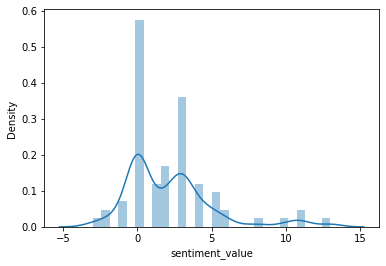

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])
     

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

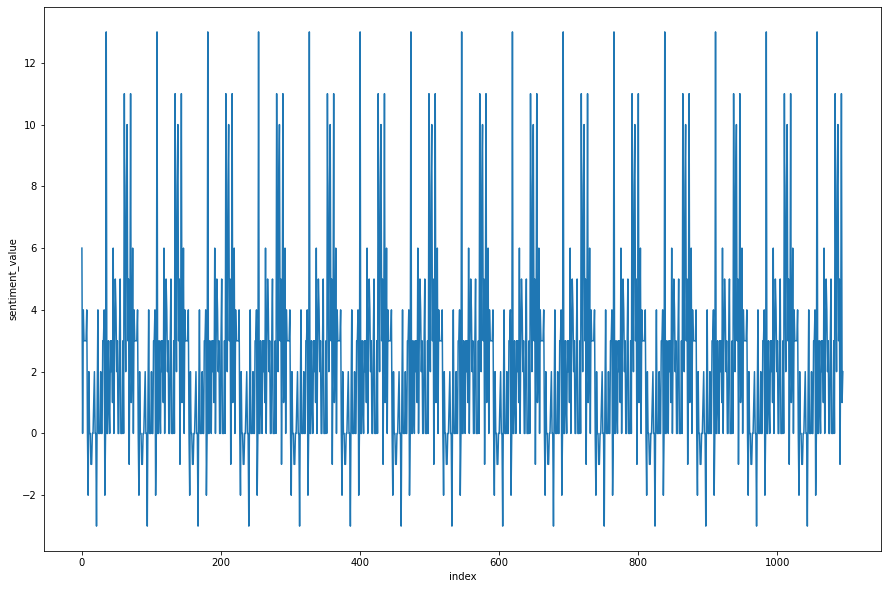

In [60]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

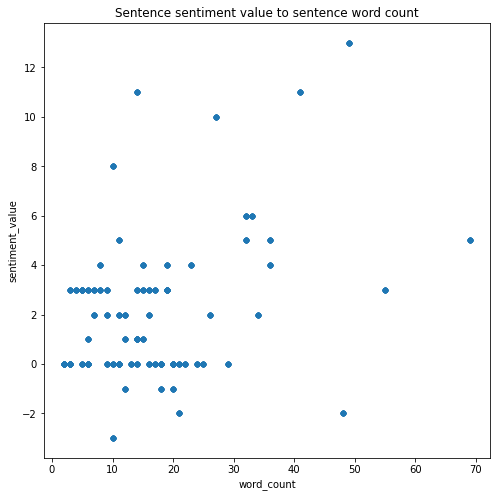

In [61]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')
     